[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import anon
# anon.conf.config.update('jax_disable_jit', True)
import emme as em
import elle.truss2d
import numpy as anp

<AxesSubplot:>

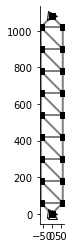

In [2]:
model = em.SkeletalModel(2,2)
# Define parameters
E = [
    model.param("E1", shape=1),
    model.param("E2", shape=1),
]
F = model.param("F",  shape=2)

# X = model.param("X", dim=20)
X =  [-60.06,59.95,-59.88,60.07,-59.80,60.02,-59.71,60.00,-59.65,59.98,-59.71,60.00,-59.80,60.02,-59.88,60.07,-60.06, 59.95]

Y = anp.cumsum(anp.array([5.0] + [10.0]*8 + [5.0])) * 12.0

#--------------------------------------------------------------------
# Add nodes to model
#--------------------------------------------------------------------
model.node( "1", 0.0,   0.0)
model.node("20", 0.0, Y[-1])
for i in range(1,19):
    model.node(str(i+1), X[i-1], Y[(i//2,(i+1)//2)[i%2]-1])
model.boun( '1', [1,1])
model.boun('20', [1,0])

prototypes = [
    elle.truss2d.resp_no3(A=1.590,E=E[1]),
    elle.truss2d.resp_no3(A=0.938,E=E[0]),
]


for i in range(1,19):
    model.truss('el-'+str(i*2-2+1*(i==1)),  str(  i), str(i+1), elem=prototypes[i!=1])
    if i-1:  model.truss( 'el-'+str(i*2-1), str(i-1), str(i+1), elem=prototypes[i==1])
i += 1

model.truss('el-'+str(i*2-2), str(  i), str(i+1), elem=prototypes[0])
model.truss('el-'+str(i*2-1), str(i-1), str(i+1), elem=prototypes[0])

model.load("10", F, dof="x")
# model.load("10", 20.0, dof="y")
em.plot_structure(model)

In [3]:
f = model.compose()
f(E1=29e3, E2=29001.0, F=4.0)

DeviceArray([[-0.00077563],
             [ 0.05430133],
             [ 0.05062759],
             [ 0.05867382],
             [-0.05500036],
             [ 0.18663983],
             [ 0.04775637],
             [ 0.19541405],
             [-0.04740396],
             [ 0.30782017],
             [ 0.03980597],
             [ 0.31662666],
             [-0.03438478],
             [ 0.40290418],
             [ 0.02666605],
             [ 0.41170814],
             [-0.01615044],
             [ 0.46137151],
             [ 0.00835992],
             [ 0.45252927],
             [ 0.00733813],
             [ 0.40489964],
             [-0.01518418],
             [ 0.39605227],
             [ 0.02559317],
             [ 0.31179479],
             [-0.03355564],
             [ 0.30293911],
             [ 0.0386045 ],
             [ 0.19259238],
             [-0.04672739],
             [ 0.18370881],
             [ 0.04640728],
             [ 0.05771668],
             [-0.05481537],
             [ 0.053

In [4]:
for Fi in [30.0, 4.0, 20.0]:
    print(f(E1=29e3, E2=29001.0, F=Fi))

[[-0.02626263]
 [ 0.40856046]
 [ 0.37893393]
 [ 0.43891338]
 [-0.41384394]
 [ 1.4011252 ]
 [ 0.35396034]
 [ 1.46494789]
 [-0.36064264]
 [ 2.31001191]
 [ 0.29144613]
 [ 2.37464797]
 [-0.26606305]
 [ 3.02316739]
 [ 0.19108678]
 [ 3.08831053]
 [-0.1313704 ]
 [ 3.46267665]
 [ 0.05300457]
 [ 3.39472758]
 [ 0.04420339]
 [ 3.03800441]
 [-0.12465509]
 [ 2.97079563]
 [ 0.1803733 ]
 [ 2.33971715]
 [-0.26443181]
 [ 2.27195333]
 [ 0.27621686]
 [ 1.44578999]
 [-0.36618453]
 [ 1.37726405]
 [ 0.33194115]
 [ 0.43422225]
 [-0.43051296]
 [ 0.3984897 ]
 [ 0.34662227]]
[[-0.00077563]
 [ 0.05430133]
 [ 0.05062759]
 [ 0.05867382]
 [-0.05500036]
 [ 0.18663983]
 [ 0.04775637]
 [ 0.19541405]
 [-0.04740396]
 [ 0.30782017]
 [ 0.03980597]
 [ 0.31662666]
 [-0.03438478]
 [ 0.40290418]
 [ 0.02666605]
 [ 0.41170814]
 [-0.01615044]
 [ 0.46137151]
 [ 0.00835992]
 [ 0.45252927]
 [ 0.00733813]
 [ 0.40489964]
 [-0.01518418]
 [ 0.39605227]
 [ 0.02559317]
 [ 0.31179479]
 [-0.03355564]
 [ 0.30293911]
 [ 0.0386045 ]
 [ 0.1925

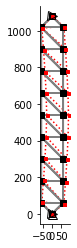

In [5]:
em.plot_displ(model, f(50e3, 29003.0, 30.0));